In [74]:
#import libraries 
import pandas as pd
import numpy as np

#importing data
creditTrain = pd.read_csv('creditdefault_train.csv')
creditTest = pd.read_csv('creditdefault_test.csv')

creditTrain
#separating trainingData and labels
y = creditTrain['Y']
X = creditTrain.drop('Y', axis = 1) 

#separating testingData and labels
y_test = creditTest['Y']
X_test = creditTest.drop('Y', axis = 1)


# KNN

In [76]:
#import corresponding libraries for KNN
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

#setting a list of neighbours
k_range = [1,3, 5,8, 10,13, 15, 20, 25, 30]

#empty arrays that will contain accuracies
k_scores = []
trainAcc = []
testAcc = []

#iteration through all neighbours
for k in k_range:
    #calling the classifier with the corresponding neighbour and using euclidean distance
    knn = KNeighborsClassifier(n_neighbors=k, metric = 'euclidean')
    #fitting training data
    knn.fit(X,y)
    #predicting labels on training data
    yPredTrain = knn.predict(X)
    #predicting labels on testing data
    yPredTest = knn.predict(X_test)
    #adding accuracy of training data - compares labels predicted on train data to actual labels
    trainAcc.append(accuracy_score(y, yPredTrain))
    #adding accuracy of testing data - compares labels predicted on test data to actual labels
    testAcc.append(accuracy_score(y_test, yPredTest))
    #scores for crossvalidation; CV - 5 folds; acting on training data
    scores = cross_val_score(knn, X,y, cv = 5, scoring = 'accuracy')
    print(scores)
    #adding mean scores to list
    k_scores.append(scores.mean())

print(k_scores)

[0.68533333 0.69066667 0.683      0.69733333 0.69366667]
[0.72266667 0.734      0.722      0.735      0.74133333]
[0.73766667 0.74633333 0.75166667 0.761      0.75766667]
[0.762      0.76866667 0.77466667 0.77866667 0.77433333]
[0.76266667 0.77166667 0.77633333 0.77866667 0.777     ]
[0.75766667 0.77366667 0.76766667 0.77166667 0.776     ]
[0.76166667 0.77466667 0.76833333 0.775      0.776     ]
[0.765      0.77766667 0.77433333 0.78366667 0.78066667]
[0.76733333 0.77566667 0.77433333 0.78433333 0.779     ]
[0.77166667 0.777      0.777      0.78333333 0.77833333]
[0.6900000000000001, 0.731, 0.7508666666666668, 0.7716666666666667, 0.7732666666666667, 0.7693333333333333, 0.7711333333333334, 0.7762666666666667, 0.7761333333333333, 0.7774666666666666]


In [77]:
#import library to plot graphs
import matplotlib.pyplot as plt

In [78]:
#creating a dataframe and adding all information in it
dataset = pd.DataFrame({'trainAcc' :trainAcc, 'testAcc' : testAcc, 'k_scores':k_scores, 'neighbours': k_range})
dataset

,trainAcc,testAcc,k_scores,neighbours
0,0.999733,0.691333,0.690000,1
1,0.843400,0.734000,0.731000,3
2,0.815467,0.751800,0.750867,5
3,0.796933,0.772933,0.771667,8
4,0.793800,0.774133,0.773267,10
5,0.792333,0.768933,0.769333,13
6,0.791000,0.770800,0.771133,15
7,0.787267,0.775533,0.776267,20
8,0.784933,0.775200,0.776133,25
9,0.783667,0.778467,0.777467,30


Text(0, 0.5, 'Accuracy')

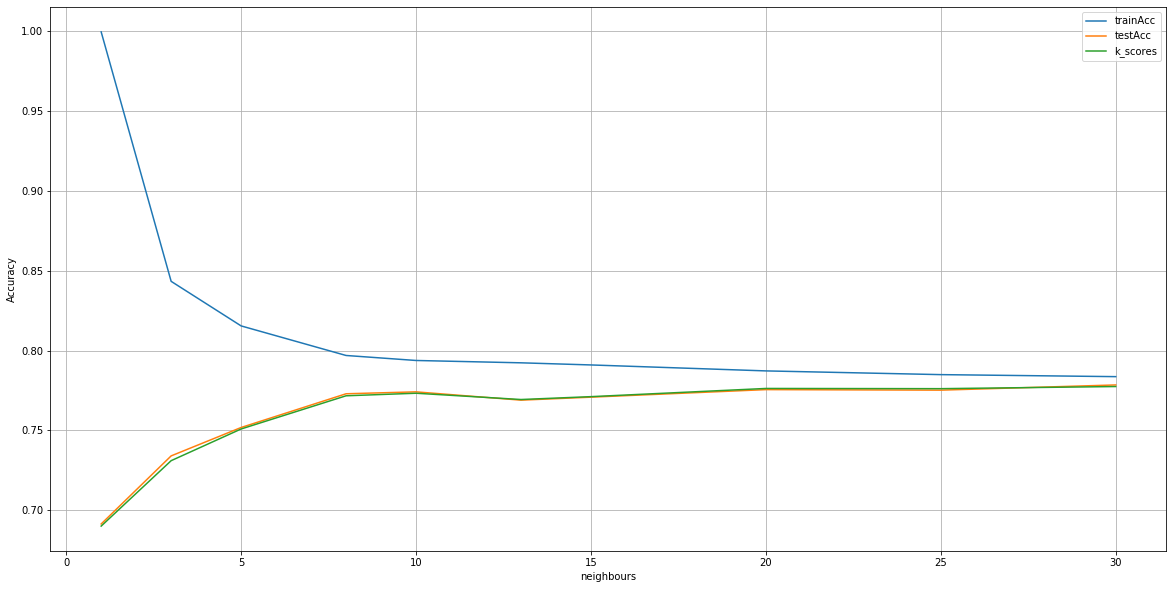

In [65]:
#plotting all accuracies on one graph
dataset.plot(x='neighbours', y=['trainAcc','testAcc','k_scores'], figsize=(20,10), grid=True)
plt.ylabel('Accuracy')

Text(0, 0.5, 'Cross-Validated Accuracy')

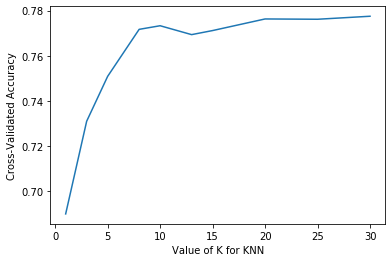

In [79]:
#plotting crossvalidation scores and comparing them to neighbours
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')

Text(0, 0.5, 'Accuracy')

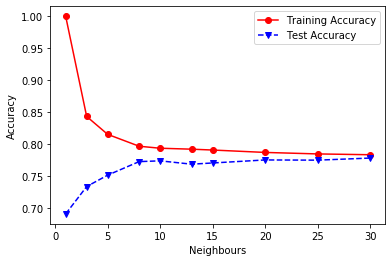

In [80]:
plt.plot(k_range,trainAcc,'ro-',k_range,testAcc,'bv--')
plt.legend(['Training Accuracy','Test Accuracy'])
plt.xlabel('Neighbours')
plt.ylabel('Accuracy')

# Decision Trees

In [81]:
from sklearn import tree


#array that stores depths of tree
maxdepths = [2,3,4,5,6,7,8,9,10,15,20,25,30,35,40,45,50]

#initialising arrays with 0s - 
trainAcc = np.zeros(len(maxdepths))
testAcc = np.zeros(len(maxdepths))
#initialising empty array
scoresAcc = []
#will keep track of the current index
index = 0

#iterating through depths in array
for depth in maxdepths:
    #setting different depths to classifier
    clf = tree.DecisionTreeClassifier(max_depth=depth)
    #fitting data
    clf = clf.fit(X, y)
    #predicting labels for training data
    Y_predTrain = clf.predict(X)
    #predicting labels for test data
    Y_predTest = clf.predict(X_test)
    #adds accuracy of training data at current index - compares labels predicted on train data to actual labels
    trainAcc[index] = accuracy_score(y, Y_predTrain)
    #adds accuracy of testing data at current index  - compares labels predicted on test data to actual labels
    testAcc[index] = accuracy_score(y_test, Y_predTest)
    #crossvalidation - 5folds - using 4 cores(n_jobs)
    scores = cross_val_score(estimator=clf, X = X, y=y, cv=5, n_jobs=4)
    #adding cross validated accuracies to list(mean of accuracies)
    scoresAcc.append((scores.mean()))
    #incrementing index
    index += 1

Text(0, 0.5, 'Accuracy')

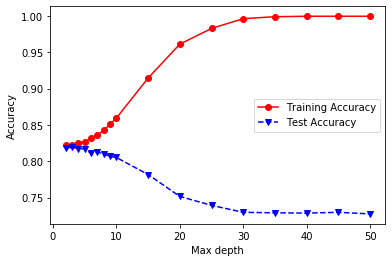

In [82]:
#comparing training data accuracy and testing data accuracy as depth increases
plt.plot(maxdepths,trainAcc,'ro-',maxdepths,testAcc,'bv--')
plt.legend(['Training Accuracy','Test Accuracy'])
plt.xlabel('Max depth')
plt.ylabel('Accuracy')

Text(0, 0.5, 'Accuracy')

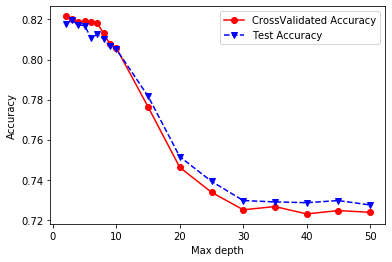

In [83]:
#comparing crossvalidated accuracies to test accuracies as depth increases
plt.plot(maxdepths,scoresAcc,'ro-',maxdepths,testAcc,'bv--')
plt.legend(['CrossValidated Accuracy','Test Accuracy'])
plt.xlabel('Max depth')
plt.ylabel('Accuracy')

In [84]:
#creating dataframe
dataset = pd.DataFrame({'trainAcc' :trainAcc, 'testAcc' : testAcc, 'scoresAcc':scoresAcc, 'depth': maxdepths})
dataset

,trainAcc,testAcc,scoresAcc,depth
0,0.822733,0.817933,0.821600,2
1,0.822933,0.819667,0.820000,3
2,0.824600,0.817267,0.818800,4
3,0.826800,0.816933,0.819200,5
4,0.831600,0.810733,0.818933,6
5,0.836000,0.812600,0.818000,7
6,0.842667,0.810267,0.813000,8
7,0.850933,0.806533,0.807600,9
8,0.859467,0.805133,0.805667,10
9,0.914533,0.781667,0.776333,15


Text(0, 0.5, 'Accuracy')

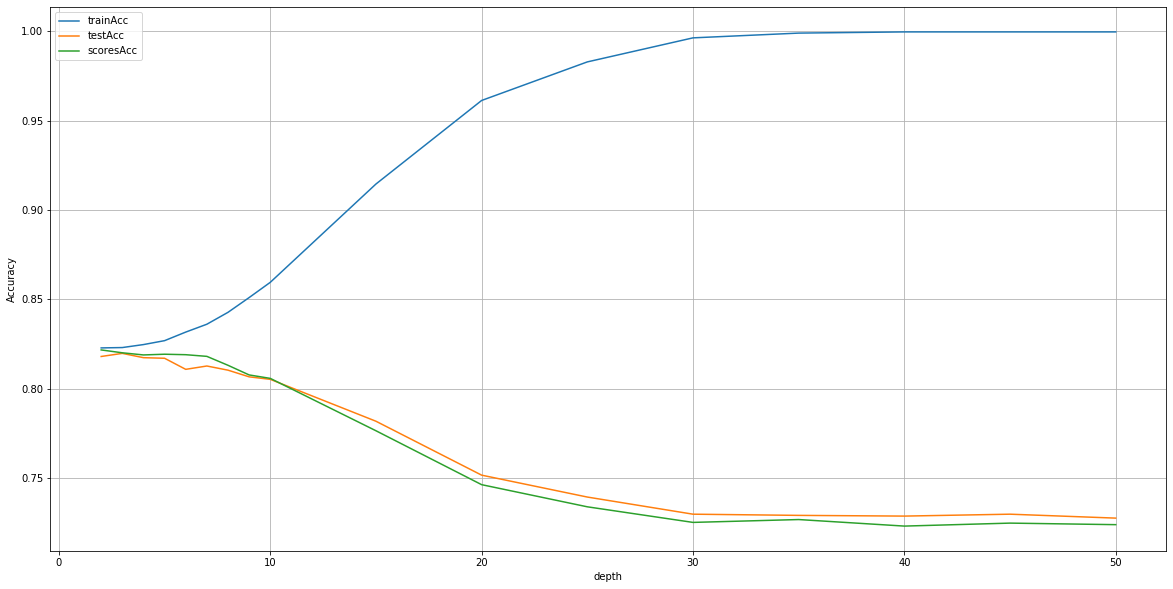

In [85]:
#plotting trainingAcc, testingAcc and scoresAcc(crossValidated acc) as depth increases
dataset.plot(x='depth', y=['trainAcc','testAcc','scoresAcc'], figsize=(20,10), grid=True)
plt.ylabel('Accuracy')

# Random Forest

In [86]:
from sklearn.ensemble import RandomForestClassifier

#array that stores depths of tree
maxdepths = [2,3,4,5,6,7,8,9,10,15,20,25,30,35,40,45,50]
#initialising arrays with 0s -
trainAcc = np.zeros(len(maxdepths))
testAcc = np.zeros(len(maxdepths))
#initiliase empty array that will store mean accuracy for scores(crossvalidation)
scoresAcc = []

#initialising current index
index = 0
#iterating through depths in array
for depth in maxdepths:
    #setting different depths to classifier
    clf = RandomForestClassifier(max_depth=depth, random_state=0)
    #fitting data
    clf.fit(X, y)
    #predicting labels for training data
    Y_predTrain = clf.predict(X)
    #predicting labels for testing data
    Y_predTest = clf.predict(X_test)
    #adds accuracy of training data at current index - compares labels predicted on train data to actual labels
    trainAcc[index] = accuracy_score(y, Y_predTrain)
    #adds accuracy of testing data at current index  - compares labels predicted on test data to actual labels
    testAcc[index] = accuracy_score(y_test, Y_predTest)
    #crossvalidation - 5folds - using 4 cores(n_jobs)
    scores = cross_val_score(estimator=clf, X = X, y=y, cv=5, n_jobs=4)
    #adding cross validated accuracies to list(mean of accuracies)
    scoresAcc.append((scores.mean()))
    #incrementing index
    index += 1

Text(0, 0.5, 'Accuracy')

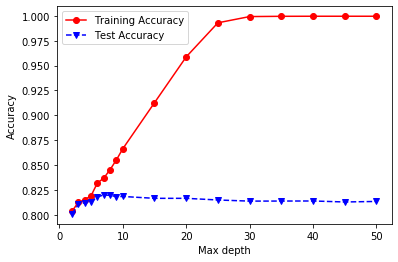

In [87]:
#comparing trainingAccuracy and testAccuracy as depth increases
plt.plot(maxdepths,trainAcc,'ro-',maxdepths,testAcc,'bv--')
plt.legend(['Training Accuracy','Test Accuracy'])
plt.xlabel('Max depth')
plt.ylabel('Accuracy')

Text(0, 0.5, 'Accuracy')

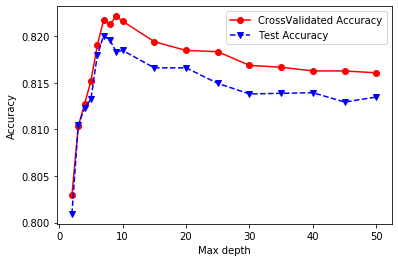

In [88]:
#comparing scoresAcc(crossvalidated scores) and testAcc as depth increases
plt.plot(maxdepths,scoresAcc,'ro-',maxdepths,testAcc,'bv--')
plt.legend(['CrossValidated Accuracy','Test Accuracy'])
plt.xlabel('Max depth')
plt.ylabel('Accuracy')

In [89]:
#creating dataframe
dataset = pd.DataFrame({'trainAcc' :trainAcc, 'testAcc' : testAcc, 'scoresAcc':scoresAcc, 'depth': maxdepths})
dataset

,trainAcc,testAcc,scoresAcc,depth
0,0.803733,0.800933,0.802933,2
1,0.812600,0.810467,0.810333,3
2,0.815200,0.812267,0.812733,4
3,0.819200,0.813267,0.815200,5
4,0.832067,0.817933,0.819000,6
5,0.836867,0.820067,0.821733,7
6,0.845467,0.819533,0.821267,8
7,0.855267,0.818333,0.822133,9
8,0.866400,0.818467,0.821600,10
9,0.912667,0.816600,0.819400,15


Text(0, 0.5, 'Accuracy')

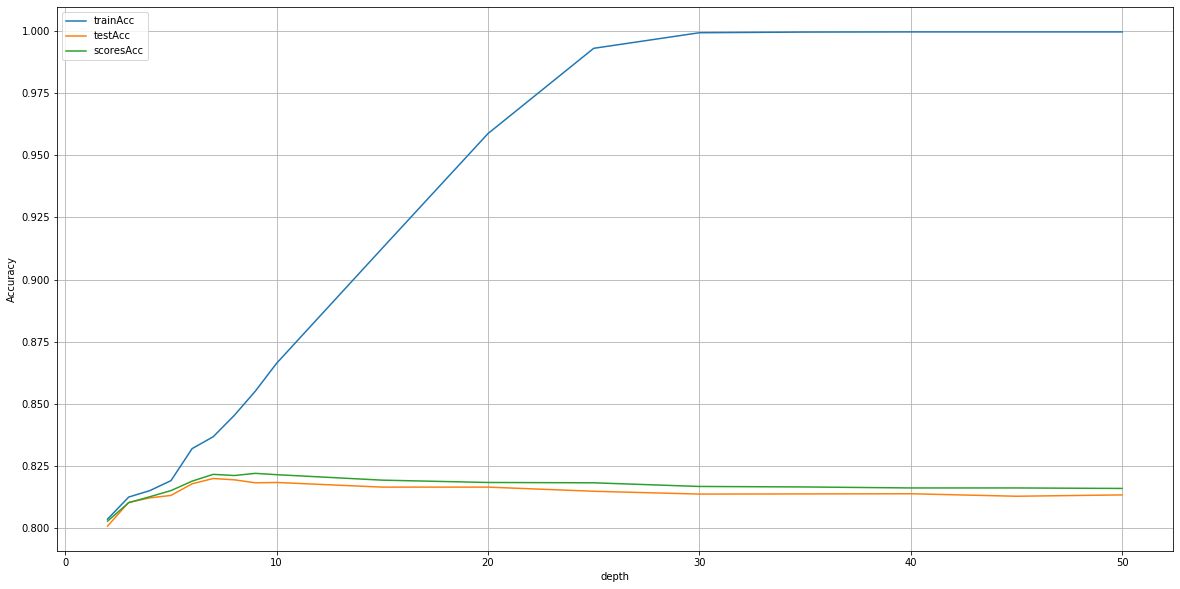

In [90]:
#plotting trainingAcc, testAcc and scoresAcc; comparing them as depth increases
dataset.plot(x='depth', y=['trainAcc','testAcc','scoresAcc'], figsize=(20,10), grid=True)
plt.ylabel('Accuracy')